In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [12]:
d = pd.read_csv('pdde_online_all.csv', encoding='utf-8')

In [23]:
# 숫자형은 최대최소 스케일링까지 완료한 데이터
df = pd.read_csv('pdde_online_cateogric.csv', encoding='utf-8')
df

,성별,연령대,거주지분류대코드,제휴사,상품대분류명,구매시간,구매금액,구매수량,구매월,cluster
0,여성,30대,Z11,A02,세제/위생,0.478261,0.001917,0.000000,01월,2
1,여성,30대,Z11,A02,음료,0.478261,0.000753,0.000000,01월,2
2,여성,30대,Z11,A02,퍼스널케어,0.478261,0.000838,0.000000,01월,2
3,여성,30대,Z11,A06,세제/위생,0.478261,0.001420,0.000000,01월,2
4,여성,30대,Z11,A06,세제/위생,0.478261,0.000710,0.040404,01월,2
...,...,...,...,...,...,...,...,...,...,...
375779,여성,50대,Z17,A02,채소,0.434783,0.000167,0.000000,05월,1
375780,여성,50대,Z17,A06,여성의류,0.782609,0.018324,0.000000,01월,0
375781,여성,50대,Z17,A06,여성의류,0.608696,0.004872,0.000000,01월,0
375782,여성,50대,Z17,A06,여성의류,0.739130,0.012642,0.000000,04월,0


In [24]:
# 기존 스케일링 해주기 전으로 설정
df['구매시간'] = d['구매시간']
df['구매금액'] = d['구매금액']
df['구매수량'] = d['구매수량']

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375784 entries, 0 to 375783
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   성별        375784 non-null  object
 1   연령대       375784 non-null  object
 2   거주지분류대코드  375784 non-null  object
 3   제휴사       375784 non-null  object
 4   상품대분류명    375784 non-null  object
 5   구매시간      375784 non-null  int64 
 6   구매금액      375784 non-null  int64 
 7   구매수량      375784 non-null  int64 
 8   구매월       375784 non-null  object
 9   cluster   375784 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 28.7+ MB


In [26]:
# 성별 숫자형으로 바꾸기
before = list(np.sort(df['성별'].unique()))
print(before)
after = [0, 1]
print(after)
df['성별'].replace(before, after, inplace=True)

['남성', '여성']
[0, 1]


In [27]:
# 연령대 숫자형으로 바꾸기
before = list(np.sort(df['연령대'].unique()))
print(before)
after = [i for i in range(len(before))]
print(after)
df['연령대'].replace(before, after, inplace=True)

['20대', '30대', '40대', '50대', '60대', '70대']
[0, 1, 2, 3, 4, 5]


In [28]:
# 거주지분류대코드 숫자형으로 바꾸기
before = list(np.sort(df['거주지분류대코드'].unique()))
print(before)
after = [i for i in range(len(before))]
print(after)
df['거주지분류대코드'].replace(before, after, inplace=True)

['Z01', 'Z02', 'Z03', 'Z04', 'Z05', 'Z06', 'Z07', 'Z08', 'Z09', 'Z10', 'Z11', 'Z12', 'Z13', 'Z14', 'Z15', 'Z16', 'Z17']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


In [29]:
# 제휴사 숫자형으로 바꾸기
before = list(np.sort(df['제휴사'].unique()))
print(before)
after = [i for i in range(len(before))]
print(after)
df['제휴사'].replace(before, after, inplace=True)

['A01', 'A02', 'A03', 'A05', 'A06']
[0, 1, 2, 3, 4]


In [30]:
# 상품대분류명 숫자형으로 바꾸기
before = list(np.sort(df['상품대분류명'].unique()))
print(before)
after = [i for i in range(len(before))]
print(after)
df['상품대분류명'].replace(before, after, inplace=True)

['가구', '건강식품', '건강용품', '건해산물', '계절가전', '공구/안전용품', '과일', '과자', '구기/필드스포츠', '기타(비상품)', '남성의류', '냉동식품', '냉장/세탁가전', '냉장식품', '대용식', '모바일', '문구/사무용품', '병통조림', '상품권', '생활/렌탈서비스', '생활/주방가전', '서적/음반/악기', '세제/위생', '속옷/양말/홈웨어', '수산물', '스포츠패션', '시즌스포츠', '식기/조리기구', '아웃도어/레저', '양곡', '여성의류', '여행/레저서비스', '영상/음향가전', '완구', '원예/애완', '유아동의류', '유아식품', '유제품', '음료', '인테리어/조명', '자동차용품', '조리식품', '조미료', '주류', '주방잡화', '채소', '청소/세탁/욕실용품', '축산물', '출산/육아용품', '침구/수예', '커피/차', '컴퓨터', '테넌트/음식점', '패션잡화', '퍼스널케어', '헬스/피트니스', '화장품/뷰티케어']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]


In [31]:
# 구매월 숫자형으로 바꾸기
before = list(np.sort(df['구매월'].unique()))
print(before)
after = [i for i in range(len(before))]
print(after)
df['구매월'].replace(before, after, inplace=True)

['01월', '02월', '03월', '04월', '05월', '06월', '07월', '08월', '09월', '10월', '11월', '12월']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [32]:
df.head()

,성별,연령대,거주지분류대코드,제휴사,상품대분류명,구매시간,구매금액,구매수량,구매월,cluster
0,1,1,10,1,22,11,13500,1,0,2
1,1,1,10,1,38,11,5300,1,0,2
2,1,1,10,1,54,11,5900,1,0,2
3,1,1,10,4,22,11,10000,1,0,2
4,1,1,10,4,22,11,5000,5,0,2


In [33]:
# X 변수 설정
x_cols = ['성별', '연령대', '거주지분류대코드', '제휴사', '상품대분류명', '구매시간', '구매금액', '구매수량', '구매월']
X = df[x_cols].values
X

array([[    1,     1,    10, ..., 13500,     1,     0],
       [    1,     1,    10, ...,  5300,     1,     0],
       [    1,     1,    10, ...,  5900,     1,     0],
       ...,
       [    1,     3,    16, ..., 34300,     1,     0],
       [    1,     3,    16, ..., 89000,     1,     3],
       [    1,     3,    16, ..., 50000,     1,     4]], dtype=int64)

In [34]:
# Y 설정
y = df['cluster'].values
y

array([2, 2, 2, ..., 0, 0, 0], dtype=int64)

In [57]:
# train test 분류
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7) # 20%를 test로, random_state으로 랜덤한 값 고정
X_train

array([[    1,     2,    16, ..., 48000,     1,     3],
       [    1,     1,     9, ...,  4200,     1,     4],
       [    1,     2,     9, ...,  3380,     1,     4],
       ...,
       [    1,     2,    10, ...,  1980,     1,     0],
       [    1,     2,     9, ...,  4000,     1,     4],
       [    1,     2,     9, ...,  1990,     1,     7]], dtype=int64)

In [76]:
tree = DecisionTreeClassifier(max_depth=6)
tree.fit(X_train, y_train) # 훈련
print('훈련 점수:', tree.score(X_train, y_train))
print('테스트 점수:', tree.score(X_test, y_test))

훈련 점수: 0.8188315440527965
테스트 점수: 0.8169085296622197


In [70]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [68]:
from sklearn.tree import plot_tree

<function matplotlib.pyplot.show(close=None, block=None)>

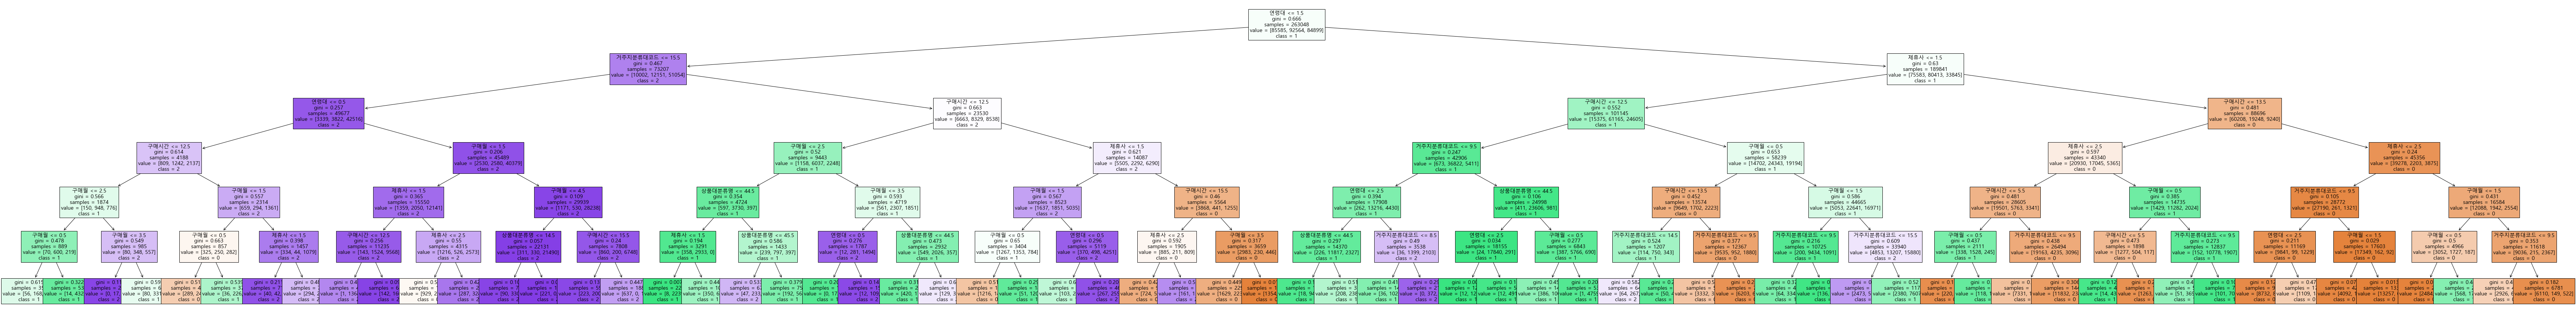

In [79]:
plt.figure(figsize=(120,15))
plot_tree(tree, feature_names = x_cols, class_names=['0', '1', '2'], filled=True, fontsize=14)
plt.show

In [99]:
# 쵸후씨는 어떤 그룹일까?
# ['성별', '연령대', '거주지분류대코드', '제휴사', '상품대분류명', '구매시간', '구매금액', '구매수량', '구매월']
# 여성, 20대, Z17, A02, 대용식, 14시, 10,000원, 1개, 8월
# [[1, 0, 16, 1, 17, 14, 10000, 1, 8]]
chohu = [[1,0,16,1,17,14,10000,1,8]]
result = tree.predict(chohu)
print("결과 :", result[0])
pct = tree.predict_proba(chohu) 
print('그룹0일확률 :', str(round(pct[0][0]*100,2))+'%,', 
      '그룹1일확률 :', str(round(pct[0][1]*100, 2))+'%,', 
      '그룹2일확률 :', str(round(pct[0][2]*100,2))+'%')
print(f"예측된 군집일 확률 : {pct[0][1]*100:.2f}%")

결과 : 1
그룹0일확률 : 21.55%, 그룹1일확률 : 50.84%, 그룹2일확률 : 27.62%
예측된 군집일 확률 : 50.84%
